<a href="https://colab.research.google.com/github/yuriliang/ccxt/blob/master/pairtrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


                 High        Low       Open  ...    return   window20   window60
Date                                         ...                                
2012-09-03  28.200001  27.525000  27.674999  ...       NaN        NaN        NaN
2012-09-04  28.150000  27.600000  27.750000  ... -0.000901        NaN        NaN
2012-09-05  27.750000  27.450001  27.549999  ... -0.006346        NaN        NaN
2012-09-06  27.600000  27.250000  27.424999  ... -0.000907        NaN        NaN
2012-09-07  28.900000  27.924999  28.049999  ...  0.034181        NaN        NaN
...               ...        ...        ...  ...       ...        ...        ...
2020-06-18  79.699997  78.349998  79.050003  ... -0.005671  79.022501  77.765001
2020-06-19  79.800003  78.699997  79.500000  ... -0.002527  79.185001  77.902501
2020-06-22  79.449997  78.199997  78.500000  ... -0.003805  79.355001  77.991667
2020-06-23  79.300003  77.550003  78.199997  ...  0.002530  79.500001  78.046667
2020-06-24  79.699997  79.00

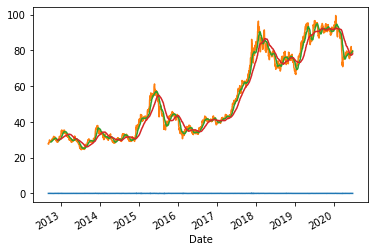

In [1]:
import pandas as pd
import pandas_datareader.data as web
df = web.DataReader("2318.HK","yahoo",start="2012-09-01")
P = df ["Close"]
P.diff()
r = P.diff()/P
df["return"] = r
df["window20"] = P.rolling(window=20).mean()
df["window60"] = P.rolling(window=60).mean()
print(df)
r.plot()
P.plot()
P.rolling(window=20).mean().plot()
P.rolling(window=60).mean().plot()

                  High         Low  ...       Volume   Adj Close
Date                                ...                         
2012-09-04   96.448570   94.928574  ...   91973000.0   83.832657
2012-09-05   96.621429   95.657143  ...   84093800.0   83.243935
2012-09-06   96.898575   95.828575  ...   97799100.0   83.994133
2012-09-07   97.497147   96.538574  ...   82416600.0   84.512062
2012-09-10   97.612854   94.585716  ...  121999500.0   82.313660
...                ...         ...  ...          ...         ...
2020-06-17  355.399994  351.089996  ...   28532000.0  351.589996
2020-06-18  353.450012  349.220001  ...   24205100.0  351.730011
2020-06-19  356.559998  345.149994  ...   66119000.0  349.720001
2020-06-22  359.459991  351.149994  ...   33861300.0  358.869995
2020-06-23  372.380005  362.269989  ...   52914600.0  366.529999

[1963 rows x 6 columns]


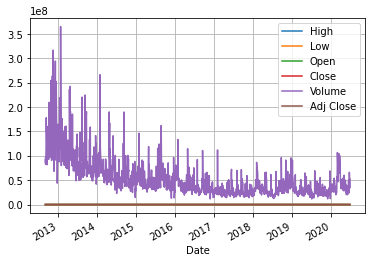

In [2]:
import pandas_datareader as pdr
import datetime
aapl = pdr.get_data_yahoo('AAPL',start=datetime.datetime(2012,9,1))
aapl.plot(grid=True)
print(aapl)

In [3]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
print(all_data)
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')
print(daily_close_px)

                         High         Low  ...       Volume   Adj Close
Ticker Date                                ...                         
AAPL   2006-10-02   10.838572   10.614285  ...  178159800.0    9.258014
       2006-10-03   10.707143   10.455714  ...  197677200.0    9.161551
       2006-10-04   10.780000   10.451428  ...  207270700.0    9.322326
       2006-10-05   10.880000   10.590000  ...  170970800.0    9.254304
       2006-10-06   10.720000   10.544286  ...  116739700.0    9.178867
...                       ...         ...  ...          ...         ...
GOOG   2011-12-23  316.154968  314.102661  ...    2918200.0  315.387848
       2011-12-27  321.041656  314.819977  ...    3224800.0  318.929565
       2011-12-28  321.295715  317.858582  ...    4270200.0  318.655609
       2011-12-29  320.299438  316.414001  ...    3162500.0  320.000549
       2011-12-30  322.172424  319.811279  ...    3577800.0  321.744019

[5292 rows x 6 columns]
Ticker           AAPL        GOOG      

In [4]:
PinganSS = pdr.get_data_yahoo('601318.SS',start=datetime.datetime(2015,1,1))
PinganHK = pdr.get_data_yahoo('2318.HK',start=datetime.datetime(2015,1,1))
print(PinganSS,PinganHK)

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2015-01-05  39.125000  37.625000  38.849998  38.080002  487143546.0  34.372822
2015-01-06  38.384998  36.005001  37.189999  36.865002  468455938.0  33.276108
2015-01-07  37.750000  36.250000  36.650002  36.705002  340773768.0  33.131687
2015-01-08  37.459999  35.400002  37.250000  35.540001  357761830.0  32.080101
2015-01-09  39.090000  35.360001  35.599998  36.419998  623746804.0  32.874428
...               ...        ...        ...        ...          ...        ...
2020-06-18  73.769997  72.379997  72.849998  73.400002   41863201.0  73.400002
2020-06-19  74.089996  73.000000  73.440002  73.419998   63598984.0  73.419998
2020-06-22  73.919998  72.610001  73.000000  72.769997   67183145.0  72.769997
2020-06-23  72.599998  71.669998  72.500000  71.959999   77963604.0  71.959999
2020-06-24  72.849998  72.010002  72.250000  72.2600

In [12]:
import pandas as pd
import pandas_datareader.data as web
pinganSS = web.DataReader("601318.SS","yahoo",start="2015-01-01")
pinganHK = web.DataReader("2318.HK","yahoo",start="2015-01-01")



NameError: ignored

In [15]:
import quandl

ModuleNotFoundError: ignored